## ETAPA 2: TRABAJO EN VARIABLES EXPLICATIVAS

In [1]:
# Dependencias básicas
import pandas as pd
import numpy as np

# Dependencias de visualización
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact

In [2]:
nacional = pd.read_csv("../10 - Padron 1998 - 2022 (nacional y comunidades)/Nacional/01005.csv", sep=";")

In [3]:
comunidades = pd.read_excel("../10 - Padron 1998 - 2022 (nacional y comunidades)/Comunidades/02006.xlsx")

In [4]:
nacional

,Nacionalidad,Sexo,Año,Total
0,TOTAL EXTRANJEROS,Ambos sexos,2022,5.542.932
1,TOTAL EXTRANJEROS,Ambos sexos,2021,5.440.148
2,TOTAL EXTRANJEROS,Ambos sexos,2020,5.434.153
3,TOTAL EXTRANJEROS,Ambos sexos,2019,5.036.878
4,TOTAL EXTRANJEROS,Ambos sexos,2018,4.734.691
...,...,...,...,...
10270,APÁTRIDAS,Mujeres,2002,166
10271,APÁTRIDAS,Mujeres,2001,131
10272,APÁTRIDAS,Mujeres,2000,111
10273,APÁTRIDAS,Mujeres,1999,85


In [5]:
comunidades

,Comunidades,País de Nacimiento,Español/Extranjero,Sexo,Año,Total
0,Total Nacional,TOTAL POBLACIÓN,TOTAL,Ambos sexos,2022,47.475.420
1,Total Nacional,TOTAL POBLACIÓN,TOTAL,Ambos sexos,2021,47.385.107
2,Total Nacional,TOTAL POBLACIÓN,TOTAL,Ambos sexos,2020,47.450.795
3,Total Nacional,TOTAL POBLACIÓN,TOTAL,Ambos sexos,2019,47.026.208
4,Total Nacional,TOTAL POBLACIÓN,TOTAL,Ambos sexos,2018,46.722.980
...,...,...,...,...,...,...
598495,19 Melilla,Resto de Países de Oceanía,Nacionalidad Extranjera,Mujeres,2002,0
598496,19 Melilla,Resto de Países de Oceanía,Nacionalidad Extranjera,Mujeres,2001,0
598497,19 Melilla,Resto de Países de Oceanía,Nacionalidad Extranjera,Mujeres,2000,0
598498,19 Melilla,Resto de Países de Oceanía,Nacionalidad Extranjera,Mujeres,1999,0


### Trabajo en archivo "comunidades"

In [6]:
# Leemos el tipo de dato que es cada columna
comunidades.dtypes

Comunidades           object
País de Nacimiento    object
Español/Extranjero    object
Sexo                  object
Año                    int64
Total                 object
dtype: object

In [7]:
# Comprobamos existencia de nulos en la cuenta de totales
comunidades["Total"].isnull().sum()

0

In [8]:
# Convertimos la columna Total del dataframe de Comunidades a integers
comunidades['Total'] = comunidades['Total'].str.replace('.', '')

C:\Users\erick\AppData\Local\Temp\ipykernel_10496\702572823.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  comunidades['Total'] = comunidades['Total'].str.replace('.', '')


In [9]:
# Asignamos tipo de datos Total a integer
comunidades["Total"] = comunidades["Total"].fillna(0).astype(int)

In [10]:
# Comprobamos extensión de datos en tipo de nacionalidad
comunidades["Español/Extranjero"].unique()

array(['TOTAL', 'Nacionalidad Española', 'Nacionalidad Extranjera'],
      dtype=object)

In [11]:
# Comprobamos extensión de los países existentes en nuestros datos
comunidades["País de Nacimiento"].unique()

array(['TOTAL POBLACIÓN', 'NACIDOS EN ESPAÑA', 'NACIDOS EN EL EXTRANJERO',
       'PAÍSES EUROPEOS', 'UNIÓN EUROPEA (27_2020)', 'Alemania',
       'Austria', 'Bélgica', 'Bulgaria', 'Chipre', 'Croacia', 'Dinamarca',
       'Eslovenia', 'Estonia', 'Finlandia', 'Francia', 'Grecia',
       'Hungría', 'Irlanda', 'Italia', 'Letonia', 'Lituania',
       'Luxemburgo', 'Malta', 'Países Bajos', 'Polonia', 'Portugal',
       'República Checa', 'República Eslovaca', 'Rumanía', 'Suecia',
       'PAÍSES EUROPEOS NO UE(27_2020)', 'Albania', 'Andorra', 'Armenia',
       'Belarús', 'Bosnia y Herzegovina', 'Georgia', 'Islandia',
       'Liechtenstein', 'Macedonia del Norte', 'Moldavia', 'Noruega',
       'Reino Unido', 'Rusia', 'Serbia y Montenegro (Antigua Yugoslavia)',
       'Serbia', 'Suiza', 'Turquía', 'Ucrania',
       'Resto de Países Europeos', 'PAÍSES AFRICANOS', 'Angola',
       'Argelia', 'Benin', 'Burkina Faso', 'Cabo Verde', 'Camerún',
       'Congo', 'Costa de Marfil', 'Egipto', 'Etiopía',

In [12]:
# Identificamos variables de grupos innecesarias para nuestro análisis
grupos = [
    "PAÍSES AFRICANOS",
    "PAÍSES ASIÁTICOS",
    "PAÍSES DE OCEANÍA",
    "Resto de Países Africanos",
    "Resto de Países de Oceanía",
    "UNIÓN EUROPEA (27_2020)",
    "PAÍSES AMERICANOS",
    "PAÍSES EUROPEOS",
    "PAÍSES EUROPEOS NO UE(27_2020)",
    "Resto de América Central y Caribe",
    "Resto de América del Sur",
    "Resto de Países Asiáticos",
    "Resto de Países Europeos",
    "AMÉRICA CENTRAL Y CARIBE",
    "AMÉRICA DEL NORTE",
    "AMÉRICA DEL SUR",
    "NACIDOS EN EL EXTRANJERO",
    'EUROPA',
    'UNIÓN EUROPEA',
    'UE(15)',
    'UE(25)',
    'UE(27)',
    'UE(28)',
    'UE(27_2020)',
    'EUROPA NO UE(27_2020)',
    'Resto de Nacionalidades Europeas',
    'ÁFRICA',
    'Resto de África',
    'AMÉRICA',
    'Resto de América Central y Caribe',
    'Resto de América del Sur',
    'ASIA',
    'Resto de Asia',
    'OCEANÍA',
    'Resto de Oceanía',
    'APÁTRIDAS'
    ]

In [13]:
# Traducimos al inglés los datos para estandarización de los datos
trad = {
    "Albania": "Albania",
    "Alemania": "Germany",
    "Arabia Saudí": "Saudi Arabia",
    "Argelia": "Algeria",
    "Belarús": "Belarus",
    "Bélgica": "Belgium",
    "Bosnia y Herzegovina": "Bosnia and Herzegovina",
    "Brasil": "Brazil",
    "Cabo Verde": "Cape Verde",
    "Camerún": "Cameroon",
    "Canadá": "Canada",
    "Chipre": "Cyprus",
    "Corea": "Korea",
    "Croacia": "Croatia",
    "Costa de Marfil": "Ivory Coast",
    "Dinamarca": "Denmark",
    "Egipto": "Egypt",
    "Eslovenia": "Slovenia",
    "Estados Unidos de América": "United States of America",
    "Etiopía": "Ethiopia",
    "Filipinas": "Philippines",
    "Finlandia": "Finland",
    "Francia": "France",
    "Guatemala": "Guatemala",
    "Guinea Ecuatorial": "Equatorial Guinea",
    "Grecia": "Greece",
    "Hungría": "Hungary",
    "Irán": "Iran",
    "Irlanda": "Ireland",
    "Islandia": "Iceland",
    "Italia": "Italy",
    "Japón": "Japan",
    "Jordania": "Jordan",
    "Kazajstán": "Kazakhstan",
    "Kenia": "Kenya",
    "Letonia": "Latvia",
    "Líbano": "Lebanon",
    "Lituania": "Lithuania",
    "Luxemburgo": "Luxembourg",
    "Macedonia del Norte": "North Macedonia",
    "Marruecos": "Morocco",
    "México": "Mexico",
    "Moldavia": "Moldova",
    "NACIDOS EN ESPAÑA": "BORN IN SPAIN",
    "Noruega": "Norway",
    "Nueva Zelanda": "New Zealand",
    "Países Bajos": "Netherlands",
    "Pakistán": "Pakistan",
    "Panamá": "Panama",
    "Perú": "Peru",
    "Polonia": "Poland",
    "Reino Unido": "United Kingdom",
    "República Checa": "Czech Republic",
    "República Democrática del Congo": "Democratic Republic of the Congo",
    "República Dominicana": "Dominican Republic",
    "República Eslovaca": "Slovak Republic",
    "Rumanía": "Romania",
    "Rusia": "Russia",
    "Serbia y Montenegro (Antigua Yugoslavia)": "Serbia",
    "Sierra Leona": "Sierra Leone",
    "Siria": "Syria",
    "Sudáfrica": "South Africa",
    "Suecia": "Sweden",
    "Suiza": "Switzerland",
    "Tailandia": "Thailand",
    "TOTAL POBLACIÓN": "TOTAL POPULATION",
    "TOTAL EXTRANJEROS": "TOTAL POPULATION",
    "Túnez": "Tunisia",
    "Turquía": "Turkey",
    "Ucrania": "Ukraine"
}

In [14]:
# Definimos diccionario con base en estándar ISO3 para estandarización de datos
codigo = {"Albania": "ALB", 
"Germany": "DEU", 
"Andorra": "AND", 
"Angola": "AGO", 
"Saudi Arabia": "SAU", 
"Algeria": "DZA", 
"Argentina": "ARG", 
"Armenia": "ARM", 
"Australia": "AUS", 
"Austria": "AUT", 
"Bangladesh": "BGD", 
"Belarus": "BLR", 
"Belgium": "BEL", 
"Benin": "BEN", 
"Bolivia": "BOL", 
"Bosnia and Herzegovina": "BIH", 
"Brazil": "BRA", 
"Bulgaria": "BGR", 
"Burkina Faso": "BFA", 
"Cape Verde": "CPV", 
"Cameroon": "CMR", 
"Canada": "CAN", 
"Chile": "CHL", 
"China": "CHN", 
"Cyprus": "CYP", 
"Colombia": "COL", 
"Congo": "COG", 
"Korea": "KOR", 
"Ivory Coast": "CIV", 
"Costa Rica": "CRI", 
"Croatia": "HRV", 
"Cuba": "CUB", 
"Denmark": "DNK", 
"Dominica": "DMA", 
"Ecuador": "ECU", 
"Egypt": "EGY", 
"El Salvador": "SLV", 
"Slovenia": "SVN", 
"United States of America": "USA", 
"Estonia": "EST", 
"Ethiopia": "ETH", 
"Philippines": "PHL", 
"Finland": "FIN", 
"France": "FRA", 
"Gambia": "GMB", 
"Georgia": "GEO", 
"Ghana": "GHA", 
"Greece": "GRC", 
"Guatemala": "GTM", 
"Equatorial Guinea": "GNQ", 
"Guinea": "GIN", 
"Guinea-Bissau": "GNB", 
"Honduras": "HND", 
"Hungary": "HUN", 
"India": "IND", 
"Indonesia": "IDN", 
"Iran": "IRN", 
"Iraq": "IRQ", 
"Ireland": "IRL", 
"Iceland": "ISL", 
"Israel": "ISR", 
"Italy": "ITA", 
"Japan": "JPN", 
"Jordan": "JOR", 
"Kazakhstan": "KAZ", 
"Kenya": "KEN", 
"Latvia": "LVA", 
"Lebanon": "LBN", 
"Liberia": "LBR", 
"Liechtenstein": "LIE", 
"Lithuania": "LTU", 
"Luxembourg": "LUX", 
"North Macedonia": "MKD", 
"Mali": "MLI", 
"Malta": "MLT", 
"Morocco": "MAR", 
"Mauritania": "MRT", 
"Mexico": "MEX", 
"Moldova": "MDA", 
"BORN IN SPAIN": "ESP", 
"Nepal": "NPL", 
"Nicaragua": "NIC", 
"Nigeria": "NGA", 
"Norway": "NOR", 
"New Zealand": "NZL", 
"Netherlands": "NLD", 
"Pakistan": "PAK", 
"Panama": "PAN", 
"Paraguay": "PRY", 
"Peru": "PER", 
"Poland": "POL", 
"Portugal": "PRT", 
"United Kingdom": "GBR", 
"Czech Republic": "CZE", 
"Democratic Republic of the Congo": "COD", 
"Dominican Republic": "DOM", 
"Slovak Republic": "SVK", 
"Romania": "ROU", 
"Russia": "RUS", 
"Senegal": "SEN", 
"Serbia and Montenegro (Former Yugoslavia)": "SRB", 
"Serbia": "SRB", 
"Sierra Leone": "SLE", 
"Syria": "SYR", 
"South Africa": "ZAF", 
"Sweden": "SWE", 
"Switzerland": "CHE", 
"Thailand": "THA", 
"Togo": "TGO", 
"TOTAL POPULATION": "TOTALES", 
"Tunisia": "TUN", 
"Turkey": "TUR", 
"Ukraine": "UKR", 
"Uruguay": "URY", 
"Venezuela": "VEN", 
"Vietnam": "VNM"
}

In [15]:
# Copia de seguridad
comunidades1 = comunidades.copy()

In [16]:
# Eliminamos variables de grupos
comunidades1 = comunidades1[~comunidades1["País de Nacimiento"].isin(grupos)]
comunidades1.drop(comunidades1[comunidades1['Comunidades'] == "Total Nacional"].index, inplace=True)
comunidades1.drop(comunidades1[comunidades1['País de Nacimiento'] == "TOTAL POBLACIÓN"].index, inplace=True)
comunidades1.drop(comunidades1[comunidades1['País de Nacimiento'] == "NACIDOS EN ESPAÑA"].index, inplace=True)
comunidades1.drop(comunidades1[comunidades1['Español/Extranjero'] == "Nacionalidad Española"].index, inplace=True)
comunidades1.drop(comunidades1[comunidades1['Español/Extranjero'] == "TOTAL"].index, inplace=True)
comunidades1.drop(comunidades1[comunidades1['Comunidades'] == "Total Nacional"].index, inplace=True)

In [17]:
# Reemplazo de valores para estandarizar en inglés
comunidades1["Sexo"].replace({"Ambos sexos": "Both", "Hombres": "Male", "Mujeres": "Female"}, inplace = True)
comunidades1["Español/Extranjero"].replace({"Nacionalidad Extranjera": "Foreign"}, inplace = True)
comunidades1.rename(columns={"Sexo": "Sex", "Año": "Year", "Comunidades": "Communities", "Español/Extranjero": "Origin"}, inplace = True)

En la celda anterior, procedimos a eliminar una serie de valores agrupadores que posiblemente podrían alterar el objetivo de nuestro análisis. Nos estamos enfocando en grupos selectos de países individuales, más allá de la información que los resume y que también incluye a los españoles, pues, deseamos conocer los motivos de la inmigración extranjera y no los motivos de reingreso de españoles.

In [18]:
# Comprobamos extensión
comunidades1

,Communities,País de Nacimiento,Origin,Sex,Year,Total
31200,01 Andalucía,Alemania,Foreign,Both,2022,0
31201,01 Andalucía,Alemania,Foreign,Both,2021,0
31202,01 Andalucía,Alemania,Foreign,Both,2020,0
31203,01 Andalucía,Alemania,Foreign,Both,2019,0
31204,01 Andalucía,Alemania,Foreign,Both,2018,0
...,...,...,...,...,...,...
598270,19 Melilla,Nueva Zelanda,Foreign,Female,2002,0
598271,19 Melilla,Nueva Zelanda,Foreign,Female,2001,0
598272,19 Melilla,Nueva Zelanda,Foreign,Female,2000,0
598273,19 Melilla,Nueva Zelanda,Foreign,Female,1999,0


In [19]:
# Traducimos países al inglés para estandarización del proyecto
# Aquellos países que sean igual en inglés y español, se pasan como tal
comunidades1["Country"] = comunidades1["País de Nacimiento"].map(trad)
comunidades1["Country"] = comunidades1["Country"].fillna(comunidades["País de Nacimiento"])

In [20]:
# Damos lectura a los países que existen en nuestros datos
comunidades1["Country"].unique()

array(['Germany', 'Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Croatia',
       'Denmark', 'Slovenia', 'Estonia', 'Finland', 'France', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Poland', 'Portugal', 'Czech Republic',
       'Slovak Republic', 'Romania', 'Sweden', 'Albania', 'Andorra',
       'Armenia', 'Belarus', 'Bosnia and Herzegovina', 'Georgia',
       'Iceland', 'Liechtenstein', 'North Macedonia', 'Moldova', 'Norway',
       'United Kingdom', 'Russia', 'Serbia', 'Switzerland', 'Turkey',
       'Ukraine', 'Angola', 'Algeria', 'Benin', 'Burkina Faso',
       'Cape Verde', 'Cameroon', 'Congo', 'Ivory Coast', 'Egypt',
       'Ethiopia', 'Gambia', 'Ghana', 'Guinea', 'Equatorial Guinea',
       'Guinea-Bissau', 'Kenya', 'Liberia', 'Mali', 'Morocco',
       'Mauritania', 'Nigeria', 'Democratic Republic of the Congo',
       'Senegal', 'Sierra Leone', 'South Africa', 'Togo', 'Tunisia',
       'Costa Rica', 'Cuba', '

In [21]:
# Mapeamos código de países
comunidades1["Country Code"] = comunidades1["Country"].map(codigo)

In [22]:
# Comprobamos existencia de nulos en los códigos
comunidades1["Country Code"].isnull().sum()

0

In [23]:
comunidades1.loc[comunidades1["Country Code"].isnull()]["Country"].unique()

array([], dtype=object)

In [24]:
comunidades1.drop("País de Nacimiento", axis = 1, inplace = True)

In [25]:
comunidades1

,Communities,Origin,Sex,Year,Total,Country,Country Code
31200,01 Andalucía,Foreign,Both,2022,0,Germany,DEU
31201,01 Andalucía,Foreign,Both,2021,0,Germany,DEU
31202,01 Andalucía,Foreign,Both,2020,0,Germany,DEU
31203,01 Andalucía,Foreign,Both,2019,0,Germany,DEU
31204,01 Andalucía,Foreign,Both,2018,0,Germany,DEU
...,...,...,...,...,...,...,...
598270,19 Melilla,Foreign,Female,2002,0,New Zealand,NZL
598271,19 Melilla,Foreign,Female,2001,0,New Zealand,NZL
598272,19 Melilla,Foreign,Female,2000,0,New Zealand,NZL
598273,19 Melilla,Foreign,Female,1999,0,New Zealand,NZL


### Trabajo en archivo "nacional"

In [26]:
nacional.Nacionalidad.unique()

array(['TOTAL EXTRANJEROS', 'EUROPA', 'UNIÓN EUROPEA', 'UE(15)', 'UE(25)',
       'UE(27)', 'UE(28)', 'UE(27_2020)', 'Alemania', 'Austria',
       'Bélgica', 'Bulgaria', 'Chipre', 'Croacia', 'Dinamarca',
       'Eslovenia', 'Estonia', 'Finlandia', 'Francia', 'Grecia',
       'Hungría', 'Irlanda', 'Italia', 'Letonia', 'Lituania',
       'Luxemburgo', 'Malta', 'Países Bajos', 'Polonia', 'Portugal',
       'República Checa', 'República Eslovaca', 'Rumanía', 'Suecia',
       'EUROPA NO UE(27_2020)', 'Albania', 'Andorra', 'Armenia',
       'Belarús', 'Bosnia y Herzegovina', 'Georgia', 'Islandia',
       'Liechtenstein', 'Macedonia del Norte', 'Moldavia', 'Noruega',
       'Reino Unido', 'Rusia', 'Serbia y Montenegro (Antigua Yugoslavia)',
       'Serbia', 'Suiza', 'Turquía', 'Ucrania',
       'Resto de Nacionalidades Europeas', 'ÁFRICA', 'Angola', 'Argelia',
       'Benin', 'Burkina Faso', 'Cabo Verde', 'Camerún', 'Congo',
       'Costa de Marfil', 'Egipto', 'Etiopía', 'Gambia', 'Ghana',
  

In [27]:
nacional.dtypes

Nacionalidad    object
Sexo            object
Año              int64
Total           object
dtype: object

In [28]:
nacional['Total'] = nacional['Total'].str.replace('.', '')

C:\Users\erick\AppData\Local\Temp\ipykernel_10496\1705393748.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nacional['Total'] = nacional['Total'].str.replace('.', '')


In [29]:
nacional.Nacionalidad = nacional.Nacionalidad.astype("string")
nacional.Sexo = nacional.Sexo.astype("string")
nacional.Total = nacional.Total.astype("int")

In [30]:
nacional1 = nacional.copy()

In [31]:
# Eliminamos variables de grupos
nacional1 = nacional1[~nacional1["Nacionalidad"].isin(grupos)]

nacional1.drop(nacional1[nacional1['Nacionalidad'] == "TOTAL EXTRANJEROS"].index, inplace=True)

In [32]:
nacional1["Country"] = nacional1["Nacionalidad"].map(trad)
nacional1["Country"] = nacional1["Country"].fillna(nacional["Nacionalidad"])

In [33]:
# Mapeamos código de países
nacional1["Country Code"] = nacional1["Country"].map(codigo)

In [34]:
# Comprobamos existencia de nulos en los códigos
nacional1["Country Code"].isnull().sum()

0

In [47]:
# Corroboramos mapeo correcto de los países y sus códigos
nacional1.loc[nacional1["Country Code"].isnull()]["Country"].unique()

array([], dtype=object)

In [48]:
# Comprobamos no inclusión de registros españoles en el dataset
nacional1['Country Code'].isin(['ESP']).any()

False

In [49]:
nacional1

,Sexo,Año,Total,Country,Country Code
600,Both,2022,116122,Germany,DEU
601,Both,2021,109556,Germany,DEU
602,Both,2020,111937,Germany,DEU
603,Both,2019,111911,Germany,DEU
604,Both,2018,111495,Germany,DEU
...,...,...,...,...,...
10120,Female,2002,112,New Zealand,NZL
10121,Female,2001,98,New Zealand,NZL
10122,Female,2000,85,New Zealand,NZL
10123,Female,1999,63,New Zealand,NZL


In [54]:
# Estandarización en inglés
nacional1.Sexo.replace({"Ambos sexos": "Both", "Hombres": "Male", "Mujeres": "Female"}, inplace = True)
nacional1.rename(columns={"Sexo": "Sex", "Año": "Year"}, inplace = True)

In [55]:
nacional1

,Sex,Year,Total,Country,Country Code
600,Both,2022,116122,Germany,DEU
601,Both,2021,109556,Germany,DEU
602,Both,2020,111937,Germany,DEU
603,Both,2019,111911,Germany,DEU
604,Both,2018,111495,Germany,DEU
...,...,...,...,...,...
10120,Female,2002,112,New Zealand,NZL
10121,Female,2001,98,New Zealand,NZL
10122,Female,2000,85,New Zealand,NZL
10123,Female,1999,63,New Zealand,NZL


Exploratory Data Analysis - Nacional

In [56]:
#Filtros para gráfico de mapa
selected_year = 2021
selected_gender = 'Both'

In [57]:
# Mapa con información de procedencia de inmigrantes, España en rojo
filtered_df = nacional1[(nacional1['Year'] == selected_year) & (nacional1['Sex'] == selected_gender)]

fig = px.choropleth(
    filtered_df,
    locations="Country Code",
    color="Total",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title=f'Immigration by Country in {selected_year} ({selected_gender})',
    labels={'Value': 'Number of Immigrants'},
    projection="natural earth"
)

spain_code = 'ESP'
spain_value = 0

fig.add_trace(
    go.Choropleth(
        locations=[spain_code],
        z=[spain_value],
        locationmode='ISO-3',
        colorscale=[[0, 'red'], [1, 'red']],
        showscale=False, 
        hoverinfo='location'
    )
)

fig.show()

El mapa nos ayuda a entender desde una perspectiva interactiva, qué países tienen un mayor registro de inmigrantes en España. Marruecos y Rumanía, en manera general, son los países que mayor inmigración aportan a través de los años.

In [58]:
# Países top en inmigración a España en 2022, según archivo trabajo 24287
paises =  [
    'DZA',
 'PER',
 'PRT',
 'PRY',
 'ROU',
 'RUS',
 'NIC',
 'PAK',
 'MAR',
 'GBR',
 'USA',
 'UKR',
 'VEN',
 'SEN',
 'CHN',
 'BGR',
 'COL',
 'CUB',
 'ARG',
 'BRA',
 'HND',
 'DEU',
 'ITA',
 'DOM',
 'ECU',
 'FRA'
]

In [59]:
# Gráfico de barras
# Parámetros de entrada
selected_year = 2020
selected_sex = "Both"

filtered_df = nacional1[
    (nacional1["Year"] == selected_year) &
    (nacional1["Sex"] == selected_sex) &
    nacional1["Country Code"].isin(paises)
]

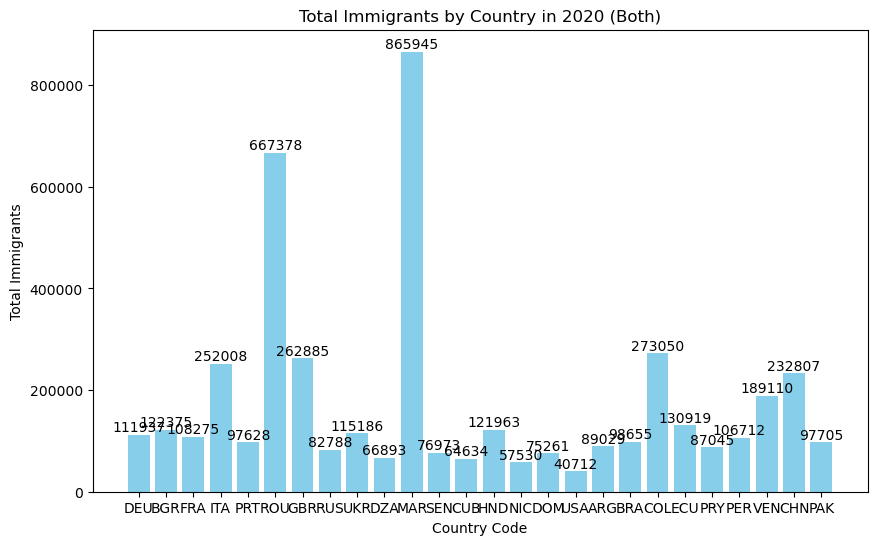

In [60]:
# Plot del gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_df['Country Code'], filtered_df['Total'], color='skyblue')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Set title and labels
plt.title(f'Total Immigrants by Country in {selected_year} ({selected_sex})')
plt.xlabel('Country Code')
plt.ylabel('Total Immigrants')

# Show the plot
plt.show()

In [61]:
# Boxplot interactivo
# Parámetros de entrada
selected_year = 2020
selected_sex = "Both"

filtered_df = nacional1[
    (nacional1["Year"] == selected_year) &
    (nacional1["Sex"] == selected_sex) &
    nacional1["Country Code"].isin(paises)
]

In [62]:
def update_boxplot(country):
    filtered_df = nacional1[nacional1['Country Code'] == country]
    fig = px.box(filtered_df, x='Sex', y='Total', title=f'Immigrant Distribution by Sex in {country}')
    fig.show()

# Interactive widget to select a country
interact(update_boxplot, country=nacional1['Country Code'].unique())

interactive(children=(Dropdown(description='country', options=('DEU', 'AUT', 'BEL', 'BGR', 'CYP', 'HRV', 'DNK'…

<function __main__.update_boxplot(country)>